In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import pandas as pd
from rdkit.Chem import rdFingerprintGenerator
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/swissadme.csv')
smiles_list = df['Canonical SMILES'].tolist()
import warnings
warnings.filterwarnings("ignore")

def fingerprint_tsne(smiles_list):
    """
    Plot a t-SNE plot of the molecular fingerprints for a list of SMILES strings
    :param smiles_list: A list of SMILES strings
    """
    from sklearn.manifold import TSNE
    from rdkit.Chem import AllChem
    # Generate molecular fingerprints using Morgan algorithm with radius=2
    fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles),
                                                 2) for smiles in smiles_list]
    # Convert the list of fingerprints to a numpy array
    fps_array = np.asarray(fps)
    tsne = TSNE(n_components=2)
    tsne_result = tsne.fit_transform(fps_array)
    sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1])
    return tsne_result

tsne_results = fingerprint_tsne(smiles_list)
# Plot the t-SNE plot
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1])
pd.DataFrame({"SMILES": smiles_list, "FingerPrint_0": tsne_results[:,0], "FingerPrint_1": tsne_results[:,1], }).to_csv('tsne_results.csv', index=False)

[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerator
[22:57:31] DEPRECATION WARNING: please use MorganGenerat

KeyboardInterrupt: 

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 34.4 MB/s eta 0:00:00


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 549.0434 - mae: 18.4134 - val_loss: 517.4102 - val_mae: 17.6814
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 538.7394 - mae: 18.1711 - val_loss: 481.1358 - val_mae: 17.0172
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 463.0470 - mae: 16.6488 - val_loss: 424.0502 - val_mae: 15.9776
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 435.5519 - mae: 16.4148 - val_loss: 371.1924 - val_mae: 15.2577
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 363.0460 - mae: 15.2151 - val_loss: 343.5606 - val_mae: 14.9082
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 356.2393 - mae: 15.4420 - val_loss: 321.7689 - val_mae: 14.5177
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325.6373 - mae: 14.7634 - val_loss: 309.0876 - val_mae: 14.2120
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 316.1103 - mae: 14.4018 - val_loss: 301.7570 - val_mae: 13.9663
Epoch 9/100
45/4

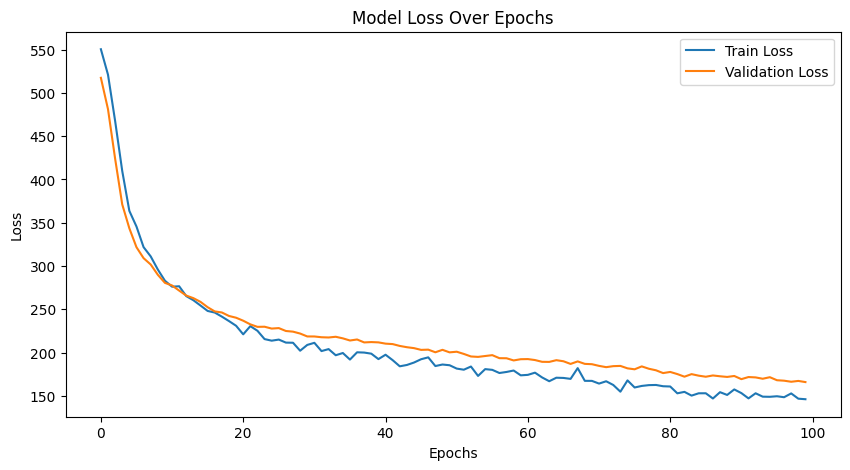

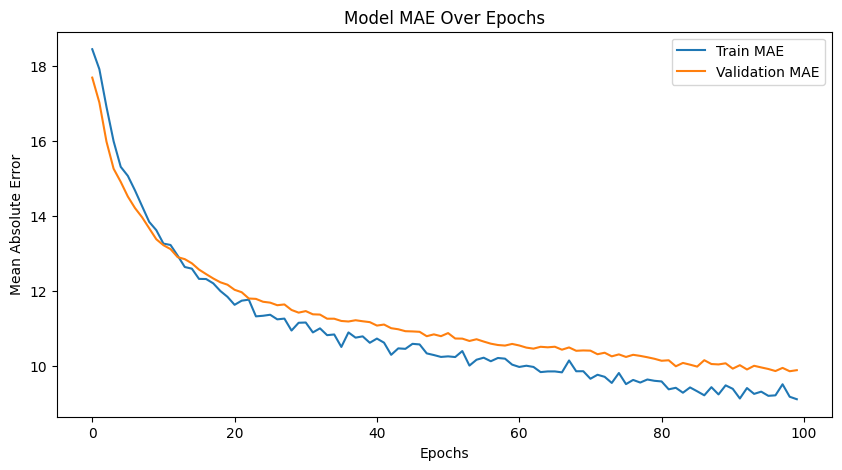

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
file_path = "/content/swissadme.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
drop_columns = ['Molecule', 'Canonical SMILES', 'Formula']
df = df.drop(columns=drop_columns)

# Define mapping of new keys to original independent variable names
key_mapping = {
    'molecular_weight': 'MW',
    'logP': 'Consensus Log P',
    'hydrogen_bond_acceptors': '#H-bond acceptors',
    'hydrogen_bond_donors': '#H-bond donors',
    'Lipinski': 'Lipinski #violations',
    'tpsa': 'TPSA',
    'BBB_Martins': 'BBB permeant',
    'Bioavailability_Ma': 'Bioavailability Score',
    'CYP1A2_Veith': 'CYP1A2 inhibitor',
    'CYP2C19_Veith': 'CYP2C19 inhibitor',
    'CYP2C9_Veith': 'CYP2C9 inhibitor',
    'CYP2D6_Veith': 'CYP2D6 inhibitor',
    'CYP3A4_Veith': 'CYP3A4 inhibitor',
    'Pgp_Broccatelli': 'Pgp substrate',
    'Leadlikeness': 'Leadlikeness #violations',
    'Synthetic_Accessibility': 'Synthetic Accessibility'
}

# Select only the mapped independent variables
independent_vars = list(key_mapping.values())

# Filter dataset based on the selected independent variables
df = df[independent_vars + ['F0', 'F1']]

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(df[independent_vars])
y = df[['F0', 'F1']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='linear')  # Output layer for F0 and F1
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# Evaluate model
eval_results = model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test MAE: {eval_results[1]}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Model MAE Over Epochs')
plt.show()

In [ ]:
!pip install admet_ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 70.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
  

In [ ]:
from admet_ai import ADMETModel

amdet = ADMETModel()
preds = amdet.predict(smiles="OS(=O)(=O)O")
print(preds)

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

individual models: 100%|██████████| 5/5 [00:00<00:00, 91.42it/s]

individual models:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

                                     

  0%|          | 0/1 [00:00<?, ?it/s]

model ensembles: 100%|██████████| 2/2 [00:00<00:00, 16.31it/s]


{'molecular_weight': 98.07899999999998, 'logP': -0.6527999999999998, 'hydrogen_bond_acceptors': 2.0, 'hydrogen_bond_donors': 2.0, 'Lipinski': 4.0, 'QED': 0.3945181101484369, 'stereo_centers': 0.0, 'tpsa': 74.6, 'AMES': 0.0012032679558046766, 'BBB_Martins': 0.7032233774662018, 'Bioavailability_Ma': 0.03488235961413011, 'CYP1A2_Veith': 0.00156209288811624, 'CYP2C19_Veith': 0.0014780993846670754, 'CYP2C9_Substrate_CarbonMangels': 0.03451090511007919, 'CYP2C9_Veith': 0.00015922732699920062, 'CYP2D6_Substrate_CarbonMangels': 0.004630549722565025, 'CYP2D6_Veith': 0.0016872096834958938, 'CYP3A4_Substrate_CarbonMangels': 0.018817745127307717, 'CYP3A4_Veith': 9.676611449780314e-08, 'Carcinogens_Lagunin': 0.2053317256271839, 'ClinTox': 0.004184706924809234, 'DILI': 0.7404057502746582, 'HIA_Hou': 0.054482274671613595, 'NR-AR-LBD': 0.00012283982062335496, 'NR-AR': 6.167935548546666e-05, 'NR-AhR': 0.004978280836771809, 'NR-Aromatase': 1.0116576980620517e-05, 'NR-ER-LBD': 0.0006577809264967982, 'NR-

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1572.0339 - mae: 31.5822 - val_loss: 930.0746 - val_mae: 22.8577
Epoch 2/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 925.8942 - mae: 23.2481 - val_loss: 759.8278 - val_mae: 20.6479
Epoch 3/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 776.1458 - mae: 21.2785 - val_loss: 688.3211 - val_mae: 19.8280
Epoch 4/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 723.9642 - mae: 20.5812 - val_loss: 623.3211 - val_mae: 18.6198
Epoch 5/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 662.0215 - mae: 19.6656 - val_loss: 615.7750 - val_mae: 18.7311
Epoch 6/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 628.6355 - mae: 19.1576 - val_loss: 542.3685 - val_mae: 17.3790
Epoch 7/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 594.0149 - mae: 18.6384 - val_loss: 530.6786 - val_mae: 17.0124
Epoch 8/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 563.8323 - mae: 18.0348 - val_loss: 494.8068 - val_mae: 16.4064
Epoch 9/100

Test Loss: 275.2056884765625, Test MAE: 11.395297050476074
Model saved successfully.


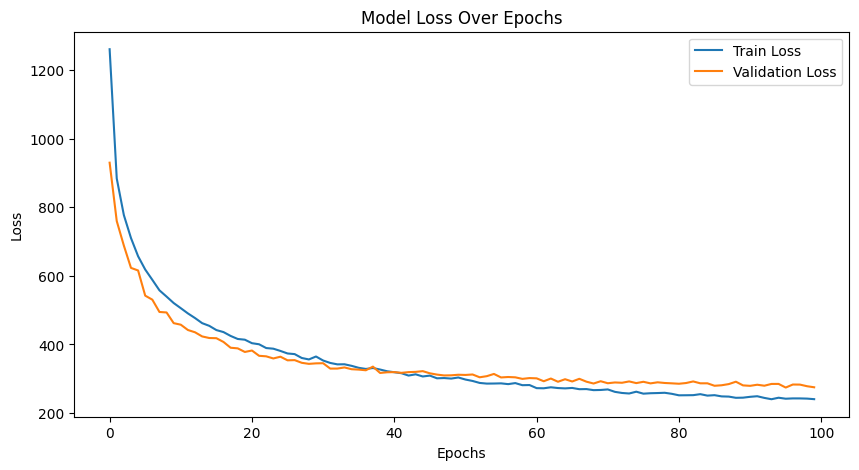

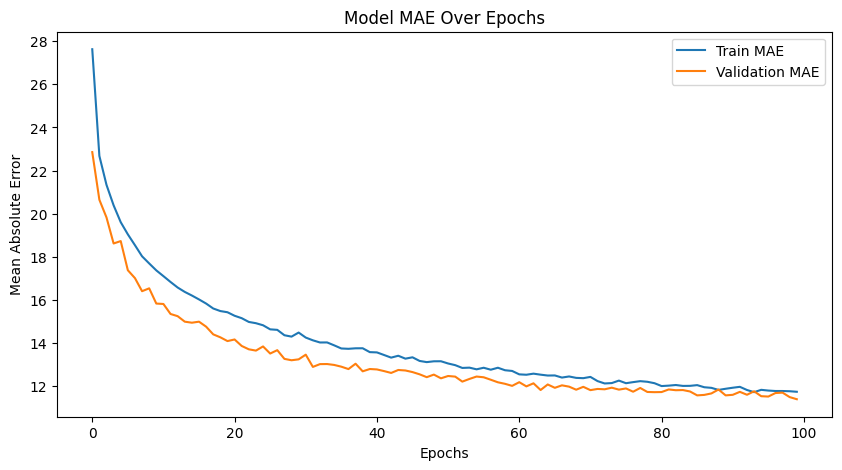

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/content/Sdmet_predictions.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Drop SMILES column
df = df.drop(columns=['SMILES'])

# Define independent and dependent variables
X = df.drop(columns=['F0', 'F1'])
y = df[['F0', 'F1']]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='linear')  # Output layer for F0 and F1
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# Evaluate model
eval_results = model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_results[0]}, Test MAE: {eval_results[1]}")

# Save model
model.save("/content/neural_network_model.h5")
print("Model saved successfully.")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Model MAE Over Epochs')
plt.show()

Descriptive Statistics:
                 F0            F1  molecular_weight          logP  \
count  16087.000000  16087.000000      16087.000000  16087.000000   
mean       0.344366      0.297945        273.937257      2.256600   
std       45.558161     46.456994        119.565844      1.609861   
min     -113.771840   -111.821010         40.065000     -5.395600   
25%      -30.914176    -33.190365        186.155000      1.214900   
50%        0.288767      0.485831        255.217000      2.163200   
75%       32.299141     35.870725        341.430500      3.232440   
max      108.119010    103.963524       1202.635000     15.879200   

       hydrogen_bond_acceptors  hydrogen_bond_donors      Lipinski  \
count             16087.000000          16087.000000  16087.000000   
mean                  3.845963              1.233543      3.888606   
std                   2.422930              1.210361      0.383060   
min                   0.000000              0.000000      1.000000   
25% 

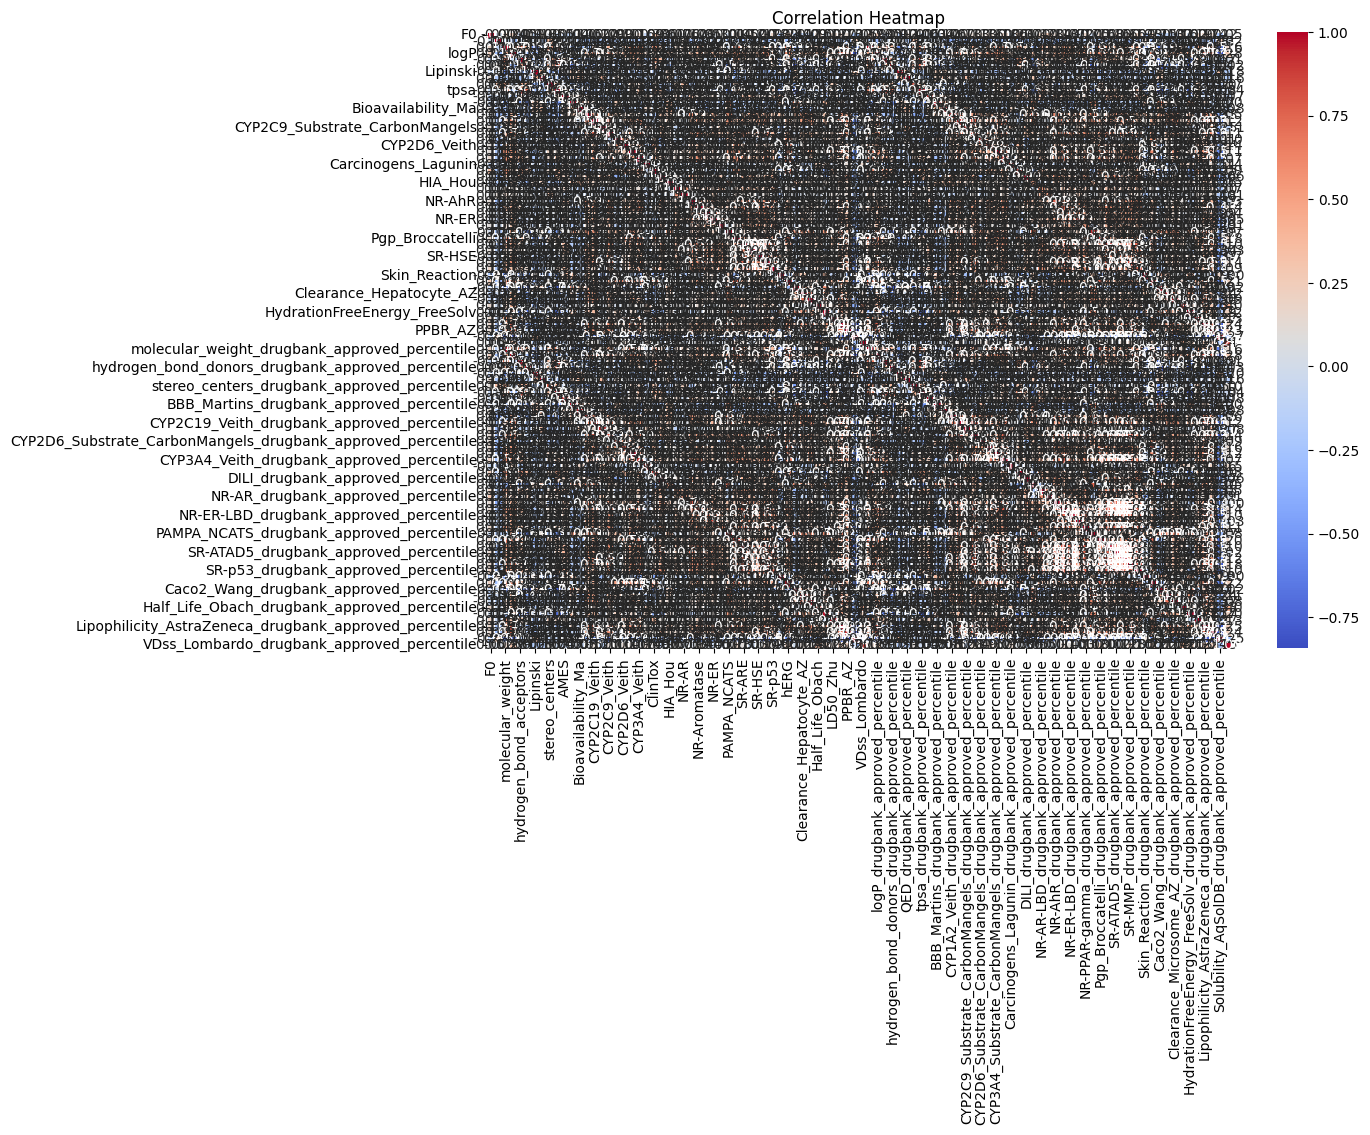

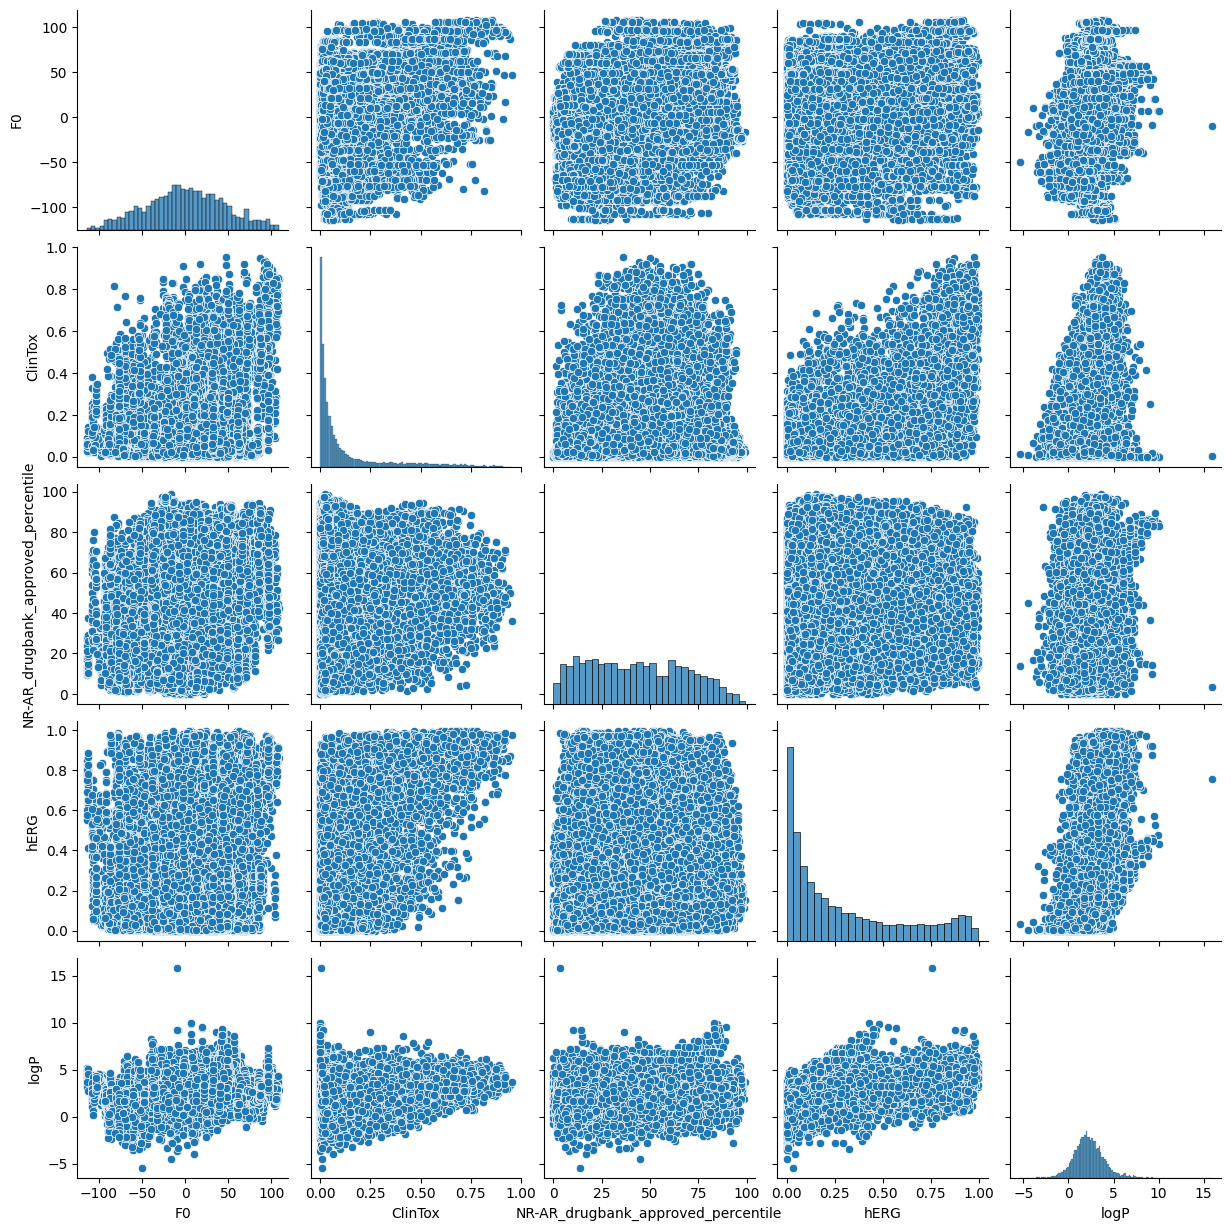

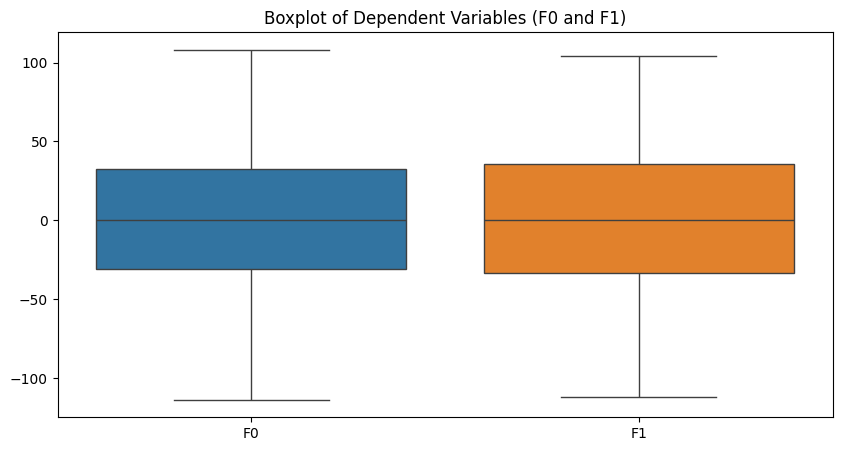

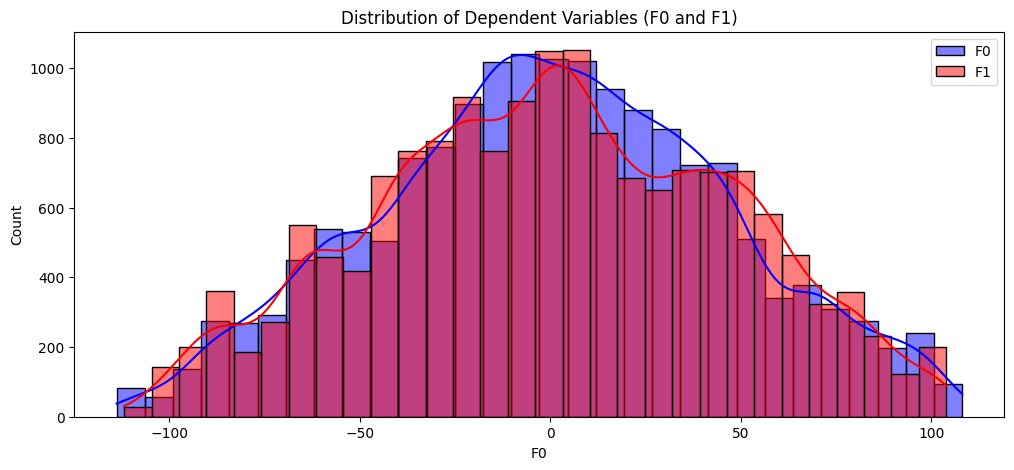

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Sdmet_predictions.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Drop SMILES column
df = df.drop(columns=['SMILES'])

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for selected highly correlated variables
high_corr_features = correlation_matrix["F0"].abs().sort_values(ascending=False).index[:5]
sns.pairplot(df[high_corr_features])
plt.show()

# Boxplot for target variables
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['F0', 'F1']])
plt.title("Boxplot of Dependent Variables (F0 and F1)")
plt.show()

# Distribution plots for F0 and F1
plt.figure(figsize=(12, 5))
sns.histplot(df['F0'], bins=30, kde=True, color='blue', label='F0')
sns.histplot(df['F1'], bins=30, kde=True, color='red', label='F1')
plt.legend()
plt.title("Distribution of Dependent Variables (F0 and F1)")
plt.show()